<a href="https://colab.research.google.com/github/bndxn/dissertation/blob/main/Input_5_Merging_inputs_and_inspecting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install suncalc --quiet

In [ ]:
from suncalc import get_position, get_times

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import tqdm
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
pv_df = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/dissertation/uk_pv/devon_pv_readings_sun_crop_colab.pkl')
print(pv_df.columns) # This should only have 6835, 7159, 7245, 7276, 7763
pv_df = pd.DataFrame(pv_df['Mean']) # We actually only care about the mean value

Index(['6835', '7159', '7245', '7276', '7763', 'Mean', 'altitude'], dtype='object')


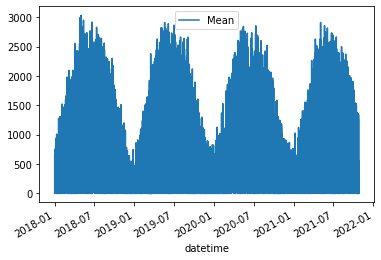

In [ ]:
pv_df.plot()

In [ ]:
train_sat_images = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/Model 12/train_sat_images_reduced.npy')
train_sat_times = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/Model 12/train_sat_times_reduced.npy')

test_sat_images = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/Model 12/test_sat_images_reduced.npy')
test_sat_times = np.load('/content/drive/My Drive/Colab Notebooks/dissertation/Model 12/test_sat_times_reduced.npy')

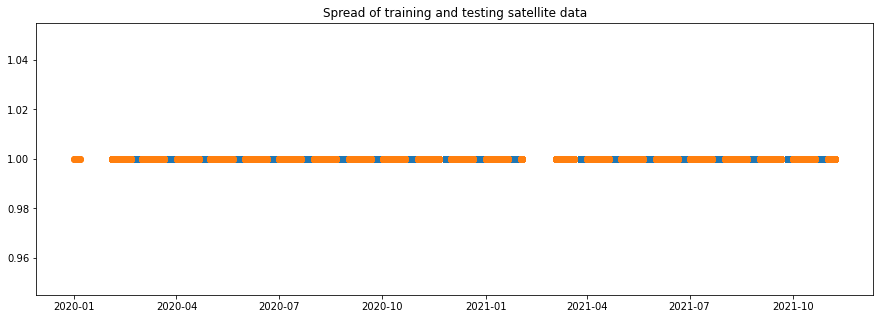

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.scatter(test_sat_times, np.ones(len(test_sat_times)))
plt.scatter(train_sat_times, np.ones(len(train_sat_times)))
plt.title('Spread of training and testing satellite data');

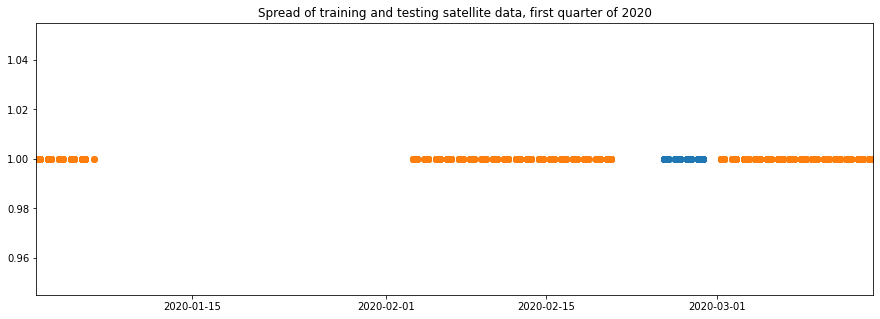

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.scatter(test_sat_times, np.ones(len(test_sat_times)))
plt.scatter(train_sat_times, np.ones(len(train_sat_times)))
plt.xlim(train_sat_times[0], train_sat_times[4000])
plt.title('Spread of training and testing satellite data, first quarter of 2020');

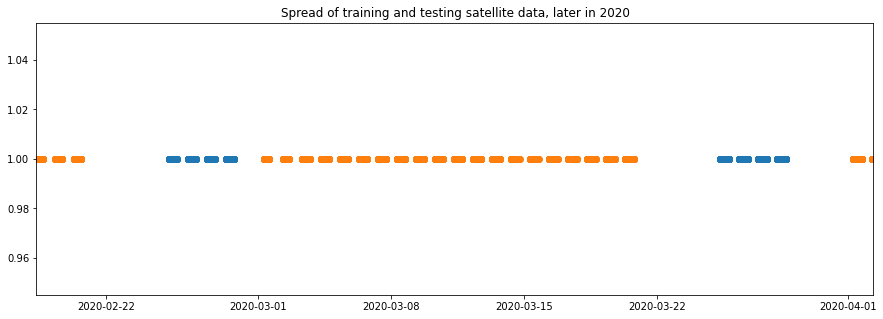

In [ ]:
fig = plt.figure(figsize=(15,5))
plt.scatter(test_sat_times, np.ones(len(test_sat_times)))
plt.scatter(train_sat_times, np.ones(len(train_sat_times)))
plt.xlim(train_sat_times[2000], train_sat_times[5000])
plt.title('Spread of training and testing satellite data, later in 2020');

# Matching PV with satellite images

In [ ]:
def pv_readings_for_sat_times(selected_sat_times, pv_readings_series):

  pv_readings_for_sat_times = []

  zero_counter = 0

  for time in selected_sat_times:
    try:
      reading = pv_readings_series[pv_readings_series.index == time][0]
      pv_readings_for_sat_times.append(reading)
    except IndexError:
      pv_readings_for_sat_times.append(0) # Maybe this is a bad idea - not very many though
      zero_counter += 1
  
  pv_readings_for_sat_times = np.asarray(pv_readings_for_sat_times, dtype=object).astype('float32')

  np.nan_to_num(pv_readings_for_sat_times, copy=False)

  print('How many readings?', len(pv_readings_for_sat_times))
  print('Mean (nan values replaced with zero earlier)', pv_readings_for_sat_times.mean())
  print('Zero counter', zero_counter)

  return pv_readings_for_sat_times

train_pv = pv_readings_for_sat_times(train_sat_times, pv_df.iloc[:,-1])
test_pv = pv_readings_for_sat_times(test_sat_times, pv_df.iloc[:,-1])

How many readings? 56434
Mean (nan values replaced with zero earlier) 696.4505
Zero counter 631
How many readings? 11405
Mean (nan values replaced with zero earlier) 738.8407
Zero counter 126


In [ ]:
print(test_sat_images.shape)
print(test_sat_times.shape)
print(test_pv.shape)

print(train_sat_images.shape)
print(train_sat_times.shape)
print(train_pv.shape)

(11405, 128, 128)
(11405,)
(11405,)
(56434, 128, 128)
(56434,)
(56434,)


# Inspecting the data, checking everything looks ok

In [ ]:
def print_prepared_grid(image_array, title_timestamps, pv_array, start, spacing):

    plt.figure(figsize=(15,15))
    for i in range(0,36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image_array[i*spacing+start])
        plt.title(pd.Timestamp(title_timestamps[i*spacing+start]))
        plt.xlabel(round(pv_array[i*spacing+start]))
    plt.tight_layout()
    plt.show()

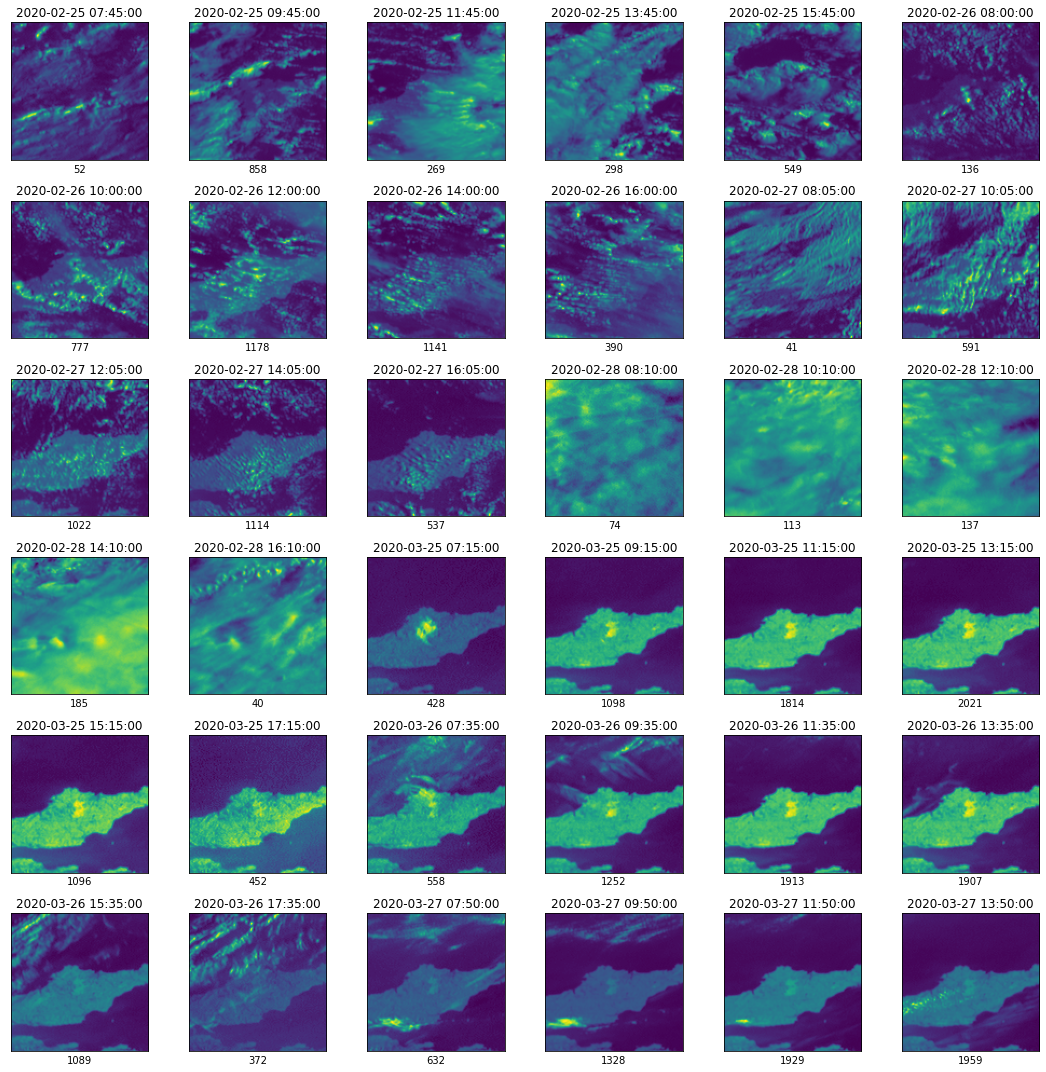

In [ ]:
print_prepared_grid(test_sat_images, test_sat_times, test_pv, 1, 24)

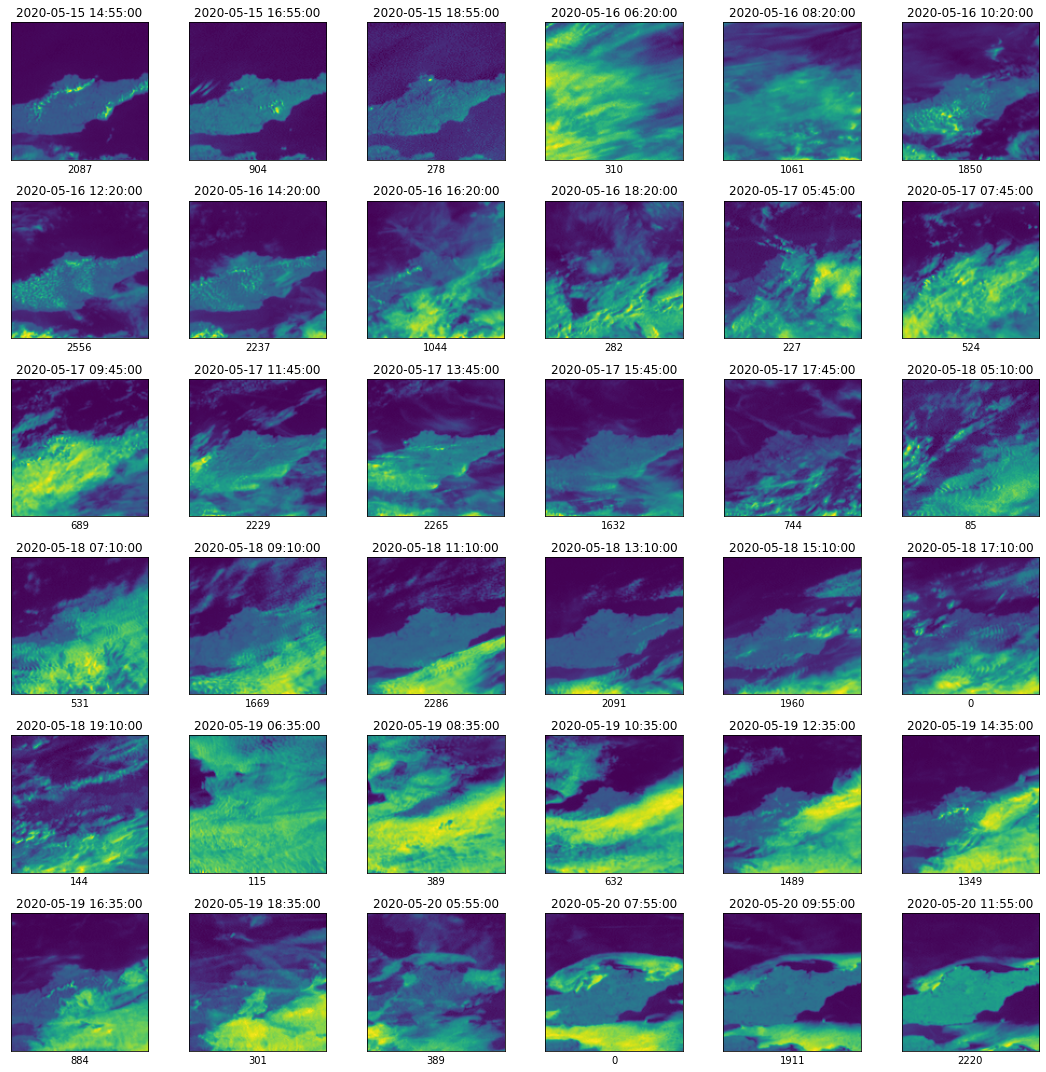

In [ ]:
print_prepared_grid(train_sat_images, train_sat_times, train_pv, np.random.randint((len(test_sat_images)-(36*12))), 24)

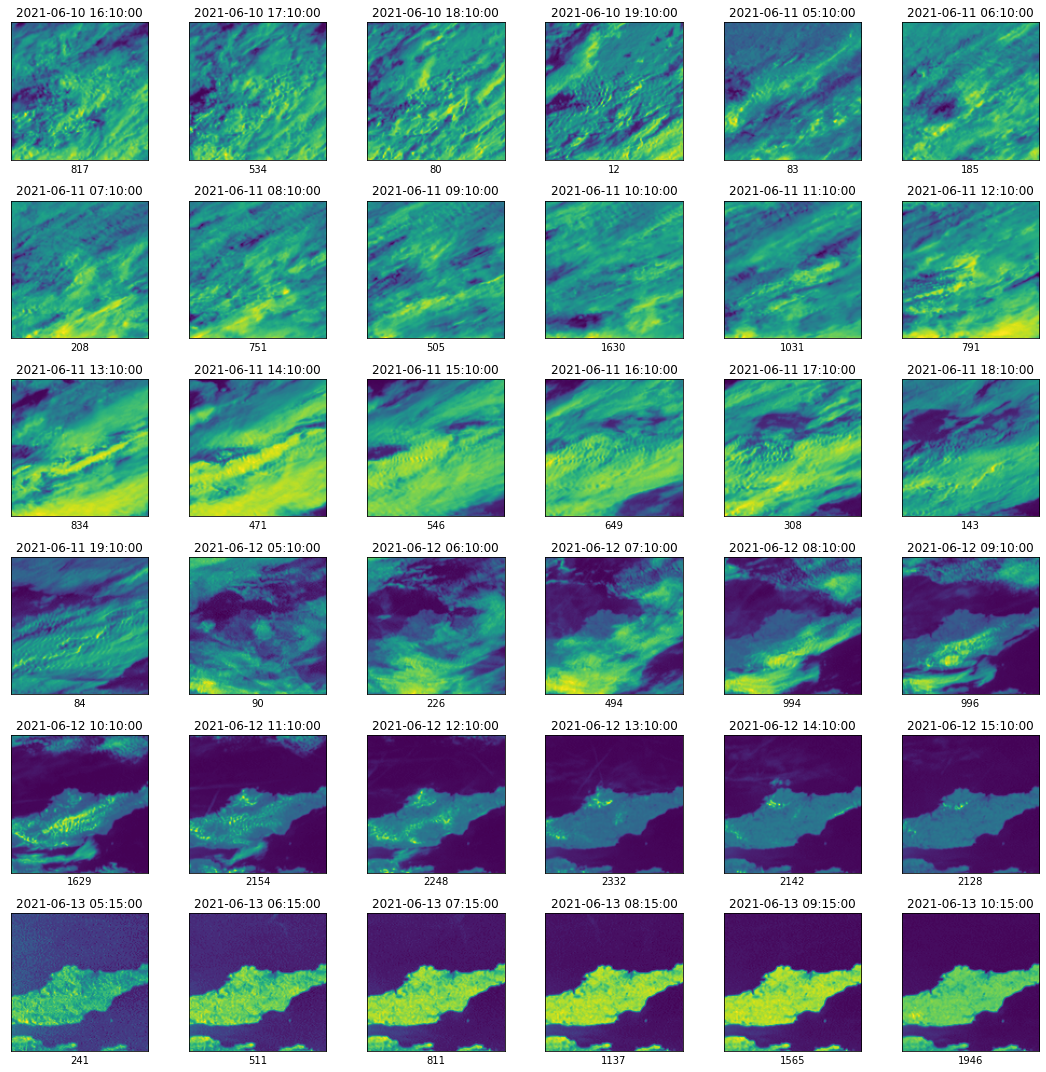

In [ ]:
print_prepared_grid(train_sat_images, train_sat_times, train_pv, np.random.randint((len(train_sat_images)-(36*12))), 12)

# Looking at the altitude


In [ ]:
lat = 50.73
lon = -4.19

pv_df['altitude'] = get_position(pv_df.index, lon, lat).get('altitude')
# get_position(x, lon, lat).get('altitude') > (5/90)

/usr/local/lib/python3.7/dist-packages/suncalc/suncalc.py:72: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  return date.astype(int) / 10 ** 6


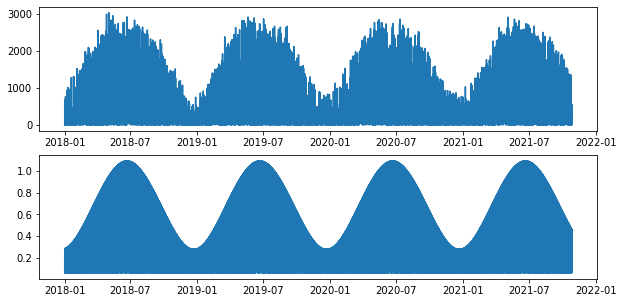

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1) 
plt.plot(pv_df.Mean)
plt.subplot(2,1,2) 
plt.plot(pv_df.altitude)

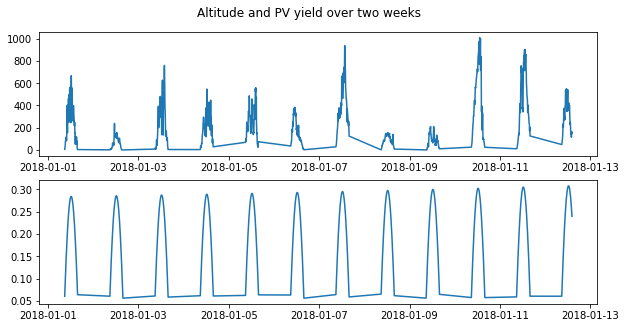

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1) 
plt.plot(pv_df[:1000].Mean)
plt.subplot(2,1,2) 
plt.plot(pv_df[:1000].altitude)
plt.suptitle('Altitude and PV yield over two weeks', y=0.95);

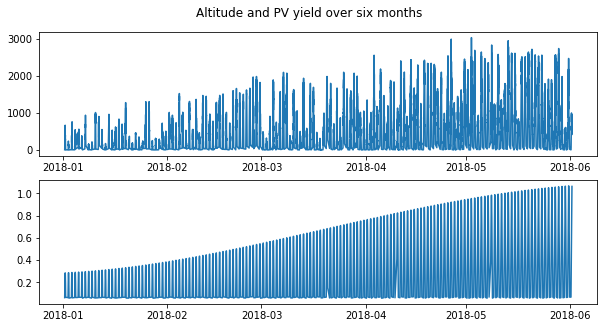

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1) 
plt.plot(pv_df[:20000].Mean, label='PV yield')
plt.subplot(2,1,2) 
plt.plot(pv_df[:20000].altitude, label='Solar altitude')
plt.suptitle('Altitude and PV yield over six months', y=0.95);

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/dissertation/Model 12/test_pv_times_reduced.npy', test_pv)
np.save('/content/drive/My Drive/Colab Notebooks/dissertation/Model 12/train_pv_times_reduced.npy', train_pv)

# Create batches of data

In [ ]:
print(test_sat_images.shape)
print(test_sat_times.shape)
print(test_pv.shape)

print(train_sat_images.shape)
print(train_sat_times.shape)
print(train_pv.shape)


(11405, 128, 128)
(11405,)
(11405,)
(56434, 128, 128)
(56434,)
(56434,)


In [ ]:
# These functions generate blocks of timestamps, 36 timestamps long, from each day

def get_list_of_days(list_of_timestamps):

  list_of_days = []

  for i in list_of_timestamps:
    list_of_days.append(pd.Timestamp(i).date())

  return list(dict.fromkeys(list_of_days))

def get_blocks_of_timestamps_for_one_day(date, list_of_timestamps):

  timestamps_in_day = []

  for i in list_of_timestamps:
    if pd.Timestamp(i).date() == date:
      timestamps_in_day.append(i)

  blocks_in_day = (len(timestamps_in_day) // (12 * 3)) 

  block_list = []

  for i in range(blocks_in_day):
    block = timestamps_in_day[(i*12*3):(i+1)*12*3] # We make a slice from the timestamps_in_day list
    block_list.append(block)

  return np.asarray(block_list)

def get_full_block_list(list_of_timestamps):

  list_of_days = get_list_of_days(list_of_timestamps)

  full_block_list = []

  for day in list_of_days:
    block_list_for_day = get_blocks_of_timestamps_for_one_day(day, list_of_timestamps)
    
    if block_list_for_day.shape[0] != 0: # some days there are no PV readings, exclude those
      full_block_list.append(block_list_for_day)

  full_block_list = np.concatenate(full_block_list)

  return full_block_list


In [ ]:
train_blocks = get_full_block_list(train_sat_times)
test_blocks = get_full_block_list(test_sat_times)
print(train_blocks.shape)
print(test_blocks.shape)

(1378, 36)
(275, 36)


In [ ]:
train_blocks

array([['2020-01-01T08:55:00.000000000', '2020-01-01T09:00:00.000000000',
        '2020-01-01T09:05:00.000000000', ...,
        '2020-01-01T11:40:00.000000000', '2020-01-01T11:45:00.000000000',
        '2020-01-01T11:50:00.000000000'],
       ['2020-01-01T11:55:00.000000000', '2020-01-01T12:00:00.000000000',
        '2020-01-01T12:05:00.000000000', ...,
        '2020-01-01T14:40:00.000000000', '2020-01-01T14:45:00.000000000',
        '2020-01-01T14:50:00.000000000'],
       ['2020-01-02T08:55:00.000000000', '2020-01-02T09:00:00.000000000',
        '2020-01-02T09:05:00.000000000', ...,
        '2020-01-02T11:40:00.000000000', '2020-01-02T11:45:00.000000000',
        '2020-01-02T11:50:00.000000000'],
       ...,
       ['2021-11-06T10:50:00.000000000', '2021-11-06T10:55:00.000000000',
        '2021-11-06T11:00:00.000000000', ...,
        '2021-11-06T13:35:00.000000000', '2021-11-06T13:40:00.000000000',
        '2021-11-06T13:45:00.000000000'],
       ['2021-11-07T07:50:00.000000000', '20

In [ ]:
# I did non-overlapping blocks, would it be a good idea to do another one with overlap?

In [ ]:
# This function creates sat and pv blocks

def get_sat_and_pv_blocks(full_block_list, sat_times_list, sat_images_list, pv_list):

  length = full_block_list.shape[0]

  sat_images_array = np.zeros(shape=(length, 12, 128, 128))
  pv_targets_array = np.zeros(shape=(length, 24))

  sat_timestamps = np.zeros(shape=(length, 12))
  pv_timestamps = np.zeros(shape=(length, 24))


  for i in range(full_block_list.shape[0]):
    for j in range(full_block_list.shape[1]):

      # For the first 12 values, get the satellite images, which we find using the index

      if j < 12:
        timestamp = full_block_list[i,j]
        index = np.where(sat_times_list == timestamp)[0][0]
        sat_images_array[i,j] = sat_images_list[index]
        sat_timestamps[i,j] = timestamp

      # If j is larger than 12, then get the pv readings, again using the index
      
      else:
        timestamp = full_block_list[i,j]
        index = np.where(sat_times_list == timestamp)[0][0]
        pv_targets_array[i,(j-12)] = pv_list[index]
        pv_timestamps[i,(j-12)] = timestamp


  print('Satellite and PV blocks generated.')
  print('\nSat images array:', sat_images_array.shape, ', PV targets array:', pv_targets_array.shape)
  print('Timestamps, sat', sat_timestamps.shape, ' , pv', pv_timestamps.shape)

  return sat_images_array, pv_targets_array, sat_timestamps, pv_timestamps


In [ ]:
train_sat_images_blocks, train_pv_targets, train_sat_timestamps, train_pv_timestamps = get_sat_and_pv_blocks(train_blocks, sat_times_list=train_sat_times, sat_images_list=train_sat_images, pv_list=train_pv)
test_sat_images_blocks, test_pv_targets, test_sat_timestamps, test_pv_timestamps = get_sat_and_pv_blocks(test_blocks, sat_times_list=test_sat_times, sat_images_list=test_sat_images, pv_list=test_pv)

Satellite and PV blocks generated.

Sat images array: (1378, 12, 128, 128) , PV targets array: (1378, 24)
Timestamps, sat (1378, 12)  , pv (1378, 24)
Satellite and PV blocks generated.

Sat images array: (275, 12, 128, 128) , PV targets array: (275, 24)
Timestamps, sat (275, 12)  , pv (275, 24)


In [ ]:
# Let's have a look - are these reasonable values? We should probably also keep the timestamp from this

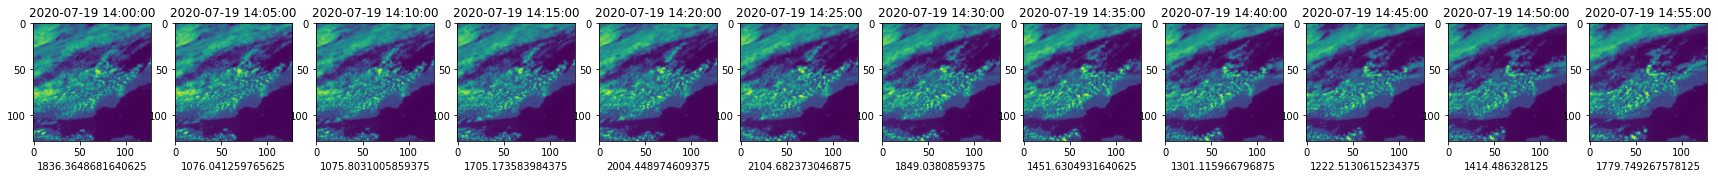

In [ ]:
def print_random_blocks(image_array, pv_target_array, sat_timestamps):

  plt.figure(figsize=(30,3))
  for i in range(12):
    plt.subplot(1, 12, i+1)
    pos = 450
    plt.imshow(image_array[pos,i])
    plt.title(pd.Timestamp(sat_timestamps[pos,i]))
    plt.xlabel(pv_target_array[pos,i])
    
 
print_random_blocks(train_sat_images_blocks, train_pv_targets, train_sat_timestamps)
    
# Last block of the day is from 3pm, and this is in July!

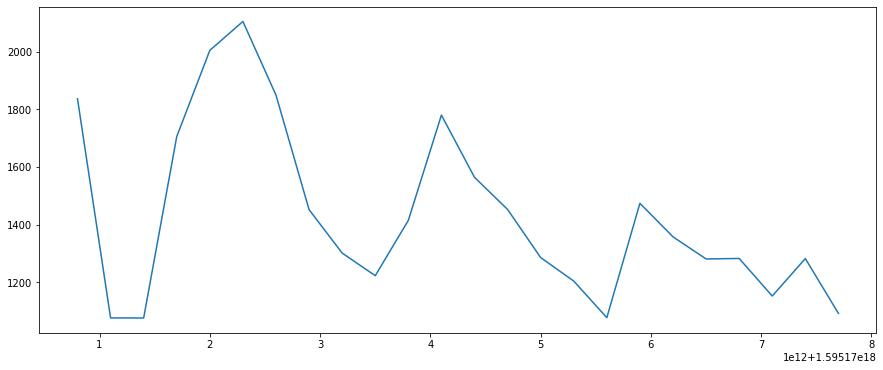

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(train_pv_timestamps[450,:], train_pv_targets[450,:])

In [ ]:
train_sat_timestamps.shape

(1378, 12)

In [ ]:
pd.Timestamp(train_sat_timestamps[1,0])

Timestamp('2020-01-01 11:55:00')

In [ ]:
# We could then save all of these so models don't need to rebuild it all from scratch